In [11]:
# Punto 3: implementación numerica del montaje optico propuesto "SISTEMA 4f"


In [2]:
### importaciones de las librerias 
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
### lectura de la imagen en escala de grises y asignada a una variable
mar=cv2.imread("mar.JPEG",cv2.IMREAD_GRAYSCALE)

### dimesiones de la imagen
np.shape(mar)

(960, 1280)

<function matplotlib.pyplot.show(close=None, block=None)>

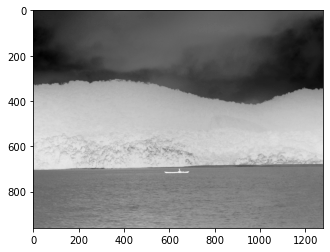

In [4]:
### ploteo de la imagen
plt.imshow(mar,cmap='Greys')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

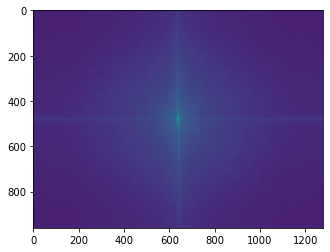

In [5]:
### transformada de Fourier y organizar las frecuencias
FFT_mar=np.fft.fftshift(np.fft.fftn(mar))
FFT_mar_log=np.log(FFT_mar)

### ploteo de la transformada
plt.imshow(np.abs(FFT_mar_log)**2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

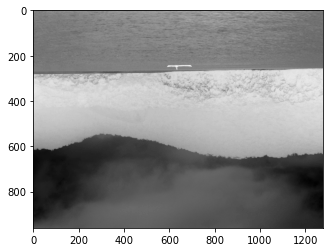

In [7]:
### transformada de Fourier  
IFFT_mar=np.fft.fftn(FFT_mar)

### plotear transformada de Fourier
plt.imshow(np.abs(IFFT_mar),cmap='Greys' )
plt.show

In [22]:
# punto 4

In [23]:
## a. Detección de objetos transparentes en objetos puros de fase
### traducir las variaciones de fase en intensidad

In [8]:
### importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d
import pandas as pd

In [9]:
### se lee la matriz y se hace vectorización
mat = pd.read_csv("a.csv",delimiter=',',dtype='str')
lect= np.vectorize(lambda t:complex(t.replace('i','j')))
datos=lect(mat)
### dimensión de la matriz
datos.shape

(719, 720)

In [28]:
type(datos[0][0])

numpy.complex128

<function matplotlib.pyplot.show(close=None, block=None)>

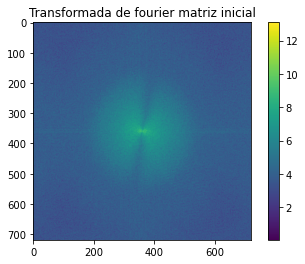

In [10]:
### traformada de Fourier para hallar el espacio de frecuencias
FFT_pa=np.fft.fftn(datos)
FFt_pca=np.fft.fftshift(FFT_pa)
fft_pca_log=np.log(FFt_pca)
plt.imshow(np.abs(fft_pca_log))
plt.title("Transformada de fourier matriz inicial")
plt.colorbar()
plt.show

In [11]:
###implementación de una onda de referencia con fase 0
mat = np.ones((719,720))
mat.shape

(719, 720)

In [12]:
### transformada de Fourier de onda de referencia con fase 0
FFT_pc=np.fft.fftn(mat)
FFt_pc=np.fft.fftshift(FFT_pc)

In [13]:
### superposicion de campos
sum = FFt_pca + FFt_pc

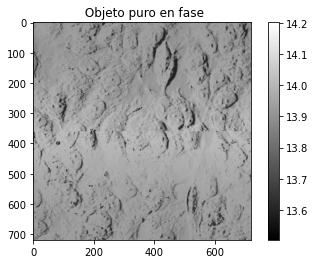

In [33]:
### transformada de Fourier de la superposicion de campos para obtener intensidad
FFT_suma=np.fft.fftn(sum)
FFt_summ=np.fft.fftshift(FFT_suma)
fft_summ_log=np.log(FFt_summ)
plt.imshow(np.abs(fft_summ_log),cmap='gray')
plt.title(" Objeto puro en fase")
plt.colorbar()
plt.show()

In [ ]:
## b.Eliminacion de ruido que afecta la informacion de intensidad

In [14]:
### importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [15]:
### definicion de metodo de ploteo complejo en intensidad,modulo y angulo del fazor
def ploteo_complejo(mat,indicador,escalas):
    
    if(indicador=="I"):
        mat=np.abs(mat)**2
    elif(indicador=="A"):
        mat=np.abs(mat)
    elif(indicador=="p"):
        mat=np.angle(mat)
        
    if(escalas==1):
        plt.gray()
        plt.figure()
        plt.imshow(mat)
        plt.show()
        
   
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001))
        plt.show()
    
    return 0

In [16]:
### dimension de la imagen
np.shape(cv2.imread('biblioteca.png',0))

(768, 768)

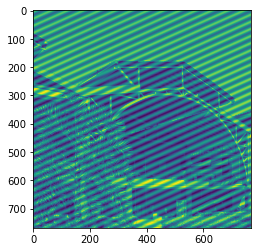

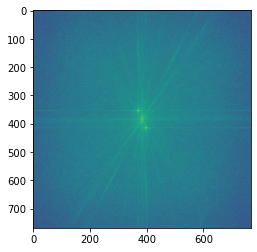

0

In [17]:
### transformada de Fourier de la imagen y organizacion de las frecuencias
img=cv2.imread('biblioteca.png',cv2.IMREAD_UNCHANGED)
fft_img=np.fft.fftn(img)
fft_img=np.fft.fftshift(fft_img)


plt.figure()
plt.imshow(img)
plt.show()


ploteo_complejo(fft_img,"I",0)

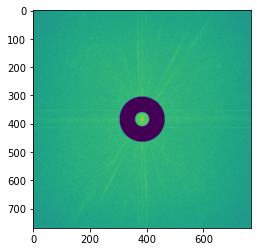

<Figure size 432x288 with 0 Axes>

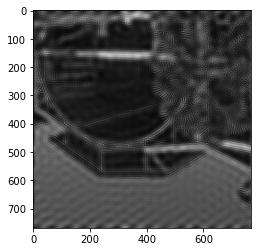

0

In [18]:
### implementación de un anillo para eliminar el ruido debido a presencia de
### frecuencias cuasipuras "dos delta de dirac"
    
x = np.arange(-768/2,768/2, 1)
y = np.arange(-768/2,768/2, 1)
xx, yy = np.meshgrid(x, y)

disco1=np.array(xx**2+yy**2<=25**2,dtype=bool)
disco1=disco1*1
disco2=np.array(xx**2+yy**2>=80**2,dtype=bool)
disco2=disco2*1
anillo=np.add(disco2,disco1)

### superposición de anillo en el espectro de la imagen
nuevaimagen=(fft_img)*anillo
ploteo_complejo(nuevaimagen,"I",0)

### transformada de Fourier sin deltas de dirac 
nuevaimagen=np.fft.fftn(fft_img*anillo)
ploteo_complejo(nuevaimagen,"I",1)



In [ ]:
### c. correlador óptico para la identificación de caracteres

In [1]:
### importación de librerias

import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

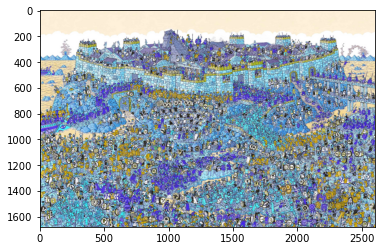

In [2]:
### Se lee y se muestra la imagen 
pc=cv2.imread("c.jpeg",cv2.IMREAD_UNCHANGED)
plt.imshow(pc)

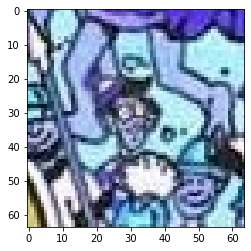

In [3]:
pc_clue=cv2.imread("c_clue.jpeg",cv2.IMREAD_UNCHANGED)
plt.imshow(pc_clue)

In [4]:
### dimensión de la imagen
np.shape(pc_clue)

(64, 64, 3)

In [5]:
np.shape(pc)

(1680, 2600, 3)

(1680, 2600)


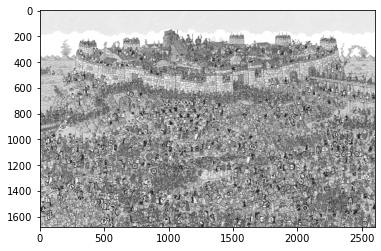

In [7]:
imagen_copia= cv2.cvtColor(pc,cv2.COLOR_BGR2GRAY)
print(imagen_copia.shape)
plt.imshow(imagen_copia,cmap='gray')

(64, 64)


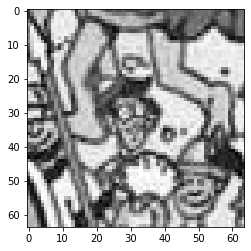

In [8]:
imagen_copiaclue= cv2.cvtColor(pc_clue,cv2.COLOR_BGR2GRAY)
print(imagen_copiaclue.shape)
plt.imshow(imagen_copiaclue,cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

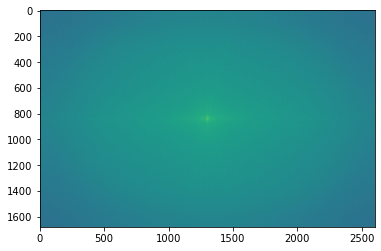

In [9]:
FFT_pc=np.fft.fftn(imagen_copia)
FFt_pc=np.fft.fftshift(FFT_pc)
fft_pc_log=np.log(FFt_pc)
plt.imshow(np.abs(fft_pc_log))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

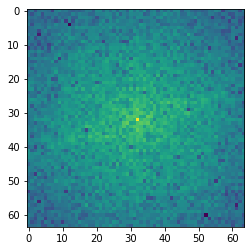

In [10]:
#@title Texto de título predeterminado
FFT_pcclue=np.fft.fftn(imagen_copiaclue)
FFt_pcclue=np.fft.fftshift(FFT_pcclue)
fft_pcclue_log=np.log(FFt_pcclue)
plt.imshow(np.abs(fft_pcclue_log))
plt.show

In [11]:
convol = convolve2d(FFt_pc,FFt_pcclue)
convol.shape

(1743, 2663)

In [ ]:
inv_uni2=np.fft.ifftn(convol)
plt.imshow(np.abs(inv_uni2),cmap='Greys')
plt.show